# Testing fastai

In [ ]:
#| default_exp nb_03a

In [ ]:
#|export
from pathlib import Path 

#|export
import pandas as pd

#| export
import matplotlib.pyplot as plt

#|export
from ml.nb_02_patching import *

In [ ]:
#|export
from ml.nb_03_dataset import *

In [ ]:
#| export
p_outx = Path("/media/dimi/TOSHIBA EXT/patched_images")
p_outy = Path("/media/dimi/TOSHIBA EXT/patched_masks")

In [ ]:
df = pd.read_pickle("data/df_all_2022_10_06.pkl")
df.shape

(1180, 95)

In [ ]:
df.loc[df["G"]=="2", "G"] = 2
df = df.loc[df["G"]!="1,2"]

In [ ]:
df.G.value_counts()

2    982
1    126
3     69
Name: G, dtype: int64

## Tmp

In [ ]:
def rename_cols(x):
    out = None
    if "path" in x:
        out = "path"
    if "label" in x:
        out = "label"
    return out

In [ ]:
def split_train_test(df):
    df = df.sample(frac=1)
    df0 = df[df.label==1][:40]
    df1 = df[df.label==2][:40]
    df2 = df[df.label==3][:40]
    df_train = pd.concat([df[df.label==1][40:],df[df.label==2][40:],df[df.label==3][40:]])
    df_test = pd.concat([df0,df1,df2])
    return df_train, df_test

In [ ]:
def get_img_paths(path, df): return path.str()+"/"+df.TMA_ID+"_"+df.TMASpot+"_0.png"
def get_df(path, df):
    df = df.copy()
    for idx in range(2):
        df["path"+str(idx)] = path.str()+"/"+df.TMA_ID+"_"+df.TMASpot+"_"+str(idx)+".png"
        df["label_"+str(idx)] = df.G
    dfs = [df[["path"+str(idx), "label_"+str(idx)]] for idx in range(2)]
    dfs = [df.rename(rename_cols, axis="columns") for df in dfs]
    tmp = [split_train_test(d) for d in dfs]
    dfs_train = [t[0] for t in tmp]
    dfs_test = [t[1] for t in tmp]
    #df0 = df[df.label==0][:sum(df.label==1)]
    #df1 = df[df.label==1]
    return pd.concat(dfs_train), dfs_test[0]
#     return dfs

In [ ]:
def sample_df(df, n=1000):
    df = df.sample(frac=1)
    df0 = df[df.label==1][:n]
    df1 = df[df.label==2][:n]
    df1 = df[df.label==3][:n]
    return pd.concat([df0,df1])

In [ ]:
df.shape

(1177, 95)

In [ ]:
dfs_train, dfs_test = get_df(p_outx, df)

In [ ]:
dfs_train.shape, dfs_test.shape

((2114, 2), (120, 2))

In [ ]:
df_x = dfs_train

In [ ]:
#df_x = get_df(p_outx, df)
#df_y = get_df(p_outy, df)

In [ ]:
df_x.shape

(2114, 2)

In [ ]:
#df_x = sample_df(df_x)
#df_y = sample_df(df_y)
#df_x.shape

In [ ]:
df_x.label.value_counts()

2    1884
1     172
3      58
Name: label, dtype: int64

In [ ]:
n=58
df_x1= df_x[df_x["label"]==1][:n]
df_x2= df_x[df_x["label"]==2][:n]
df_x3= df_x[df_x["label"]==3][:n]
df_x = pd.concat([df_x1,df_x2,df_x3])

In [ ]:
df_x.shape

(174, 2)

In [ ]:
df_x.label.value_counts()

1    58
2    58
3    58
Name: label, dtype: int64

In [ ]:
df_x

,path,label
1103,/media/dimi/TOSHIBA EXT/patched_images/TMA29_A13_0.png,1
1142,/media/dimi/TOSHIBA EXT/patched_images/TMA29_F05_0.png,1
973,/media/dimi/TOSHIBA EXT/patched_images/TMA27_F09_0.png,1
708,/media/dimi/TOSHIBA EXT/patched_images/TMA25_F13_0.png,1
1073,/media/dimi/TOSHIBA EXT/patched_images/TMA28_F09_0.png,1
...,...,...
1024,/media/dimi/TOSHIBA EXT/patched_images/TMA28_C03_1.png,3
738,/media/dimi/TOSHIBA EXT/patched_images/TMA25_B05_1.png,3
863,/media/dimi/TOSHIBA EXT/patched_images/TMA26_D08_1.png,3
965,/media/dimi/TOSHIBA EXT/patched_images/TMA27_F08_1.png,3


## Tmp end

##  Whole images

In [ ]:
from fastai.vision.all import *

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
df.head()

,TMA_ID,TMASpot,fn_x,fn_y,Relevanz,AlternativeBelegung,PatID,EDatum,Alter,G,...,event_10y_recurrence,stime_10y_recurrence,event_5y_death,stime_5y_death,event_10y_death,stime_10y_death,event_5y_dom,stime_5y_dom,event_10y_dom,stime_10y_dom
0,TMA1,E12,/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/12-E.tif,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/12-E.tif,2,NaN,76987.0,2004-11-21,57.0,2,...,0,10.000000,0,5.0,0,10.000000,0,5.0,0,10.000000
1,TMA1,D02,/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/2-D.tif,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/2-D.tif,2,26_F05,64717.0,2003-08-05,64.0,2,...,0,10.000000,0,5.0,0,10.000000,0,5.0,0,10.000000
2,TMA1,A05,/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/5-A.tif,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/5-A.tif,2,NaN,46657.0,1998-02-25,35.0,2,...,0,10.000000,0,5.0,0,10.000000,0,5.0,0,10.000000
3,TMA1,A10,/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-A.tif,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-A.tif,2,NaN,69211.0,1999-07-15,59.0,2,...,0,9.304110,0,5.0,0,9.304110,0,5.0,0,9.304110
4,TMA1,B10,/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-B.tif,/media/dimi/TOSHIBA EXT/Dimitrij Shape Masks/TMA01/10-B.tif,2,NaN,79717.0,2001-10-11,62.0,2,...,0,7.019178,0,5.0,0,7.019178,0,5.0,0,7.019178


In [ ]:
tmp = df[["fn_x", "G"]]

In [ ]:
tmp.columns = ["path", "label"]

In [ ]:
tmp.head()

,path,label
0,/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/12-E.tif,2
1,/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/2-D.tif,2
2,/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/5-A.tif,2
3,/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-A.tif,2
4,/media/dimi/TOSHIBA EXT/Dimitrij Original Images/TMA01_correctNames_SingleCores/10-B.tif,2


In [ ]:
mean_img

[0.8868493, 0.7803772, 0.87521]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
from sklearn.metrics import cohen_kappa_score

kappa = skm_to_fastai(cohen_kappa_score)

In [ ]:
dblock = DataBlock(
  blocks=(ImageBlock, CategoryBlock),      # one image input and one categorical targets
  getters=[ColReader('path'),   # image input
           ColReader('label')],                    # label 1
  splitter=RandomSplitter(valid_pct=0.2, seed=42),
  item_tfms= [Resize(512)]
           )

In [ ]:
from sklearn.utils import class_weight

In [ ]:
dls = dblock.dataloaders(tmp, bs=16)   # Create the dataloaders

In [ ]:
y = df.G.to_numpy()
class_weights=class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weights=torch.tensor(class_weights,dtype=torch.float)
class_weights

tensor([3.1138, 0.3995, 5.6860])

In [ ]:
lf = nn.CrossEntropyLoss(weight=class_weights,reduction='mean')

In [ ]:
learn = vision_learner(dls, resnet18, metrics=[accuracy, kappa], loss_func=lf)

/home/dimi/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dimi/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0010000000474974513)

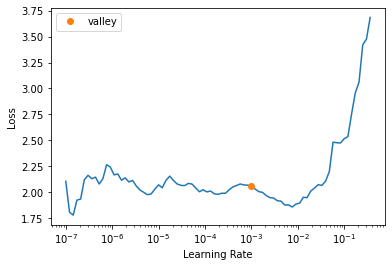

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,cohen_kappa_score,time
0,1.813900,1.130796,0.514894,0.189116,42:08


epoch,train_loss,valid_loss,accuracy,cohen_kappa_score,time
0,1.141372,0.918602,0.578723,0.254040,42:22
1,0.860057,1.221224,0.570213,0.169611,42:22


KeyboardInterrupt: 

In [ ]:
import torchvision.transforms as transforms

In [ ]:
mean_img

[0.8868493, 0.7803772, 0.87521]

In [ ]:
dblock = DataBlock(
  blocks=(ImageBlock, CategoryBlock),      # one image input and one categorical targets
  getters=[ColReader('path'),   # image input
           ColReader('label')],                    # label 1
           splitter=RandomSplitter(valid_pct=0.0),
           item_tfms= Normalize(mean_img[0], std_img[0])
           )
test_dl = dblock.dataloaders(dfs_test, bs=100)   # Create the dataloaders

In [ ]:
preds, a = learn_x.get_preds(dl=test_dl)

In [ ]:
#preds

In [ ]:
dfs_test.path.tolist()[0]

'/media/dimi/TOSHIBA EXT/patched_images/TMA8_B14_0.png'

In [ ]:
preds= [learn_x.predict(dfs_test.path.tolist()[i]) for i in range(100)];

In [ ]:
predss = np.array([int(p[0]) for p in preds])
predss

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
dfs_test

,path,label
611,/media/dimi/TOSHIBA EXT/patched_images/TMA8_B14_0.png,0
688,/media/dimi/TOSHIBA EXT/patched_images/TMA25_A11_0.png,0
84,/media/dimi/TOSHIBA EXT/patched_images/TMA1_H08_0.png,0
672,/media/dimi/TOSHIBA EXT/patched_images/TMA8_E09_0.png,0
158,/media/dimi/TOSHIBA EXT/patched_images/TMA2_H05_0.png,0
...,...,...
728,/media/dimi/TOSHIBA EXT/patched_images/TMA25_H03_0.png,1
1100,/media/dimi/TOSHIBA EXT/patched_images/TMA29_F12_0.png,1
164,/media/dimi/TOSHIBA EXT/patched_images/TMA2_F06_0.png,1
59,/media/dimi/TOSHIBA EXT/patched_images/TMA1_F05_0.png,1


In [ ]:
(dfs_test.label==predss).sum()/100.

0.9

In [ ]:
learn.summary()

Sequential (Input shape: 32 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 64 x 64   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
dls_y = dblock.dataloaders(df_y, bs=64)   # Create the dataloaders

In [ ]:
learn_y = vision_learner(dls_y, resnet34, metrics = accuracy)

/home/dimi/anaconda3/envs/niendorf/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/dimi/anaconda3/envs/niendorf/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn_y.fine_tune(40)

epoch,train_loss,valid_loss,accuracy,time
0,1.268086,0.812554,0.600000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.151098,0.696656,0.555556,00:01
1,1.070076,0.702283,0.555556,00:01
2,0.924631,0.745818,0.577778,00:01
3,0.782824,0.847792,0.555556,00:01
4,0.691135,0.944078,0.511111,00:01
5,0.608579,1.011946,0.488889,00:01
6,0.537987,1.031823,0.577778,00:01
7,0.477956,1.090442,0.555556,00:01
8,0.425819,1.171084,0.511111,00:01
9,0.385232,1.244808,0.511111,00:01


In [ ]:
learn_x = vision_learner(dls_x, resnet34, metrics = accuracy)

/home/dimi/anaconda3/envs/niendorf/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn_x.fine_tune(40)

epoch,train_loss,valid_loss,accuracy,time
0,1.195021,0.786642,0.559322,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.944539,0.712566,0.614407,00:02
1,0.867179,0.683273,0.627119,00:02
2,0.827362,0.609154,0.699153,00:02
3,0.746740,0.570273,0.724576,00:02
4,0.671749,0.511879,0.766949,00:02
5,0.607514,0.512329,0.762712,00:02
6,0.545013,0.475822,0.805085,00:02
7,0.484690,0.431319,0.822034,00:02
8,0.440631,0.423271,0.834746,00:02
9,0.375423,0.392553,0.898305,00:02
